In [1]:
import nest
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%pylab inline

# part 2

In [ ]:
nest.ResetKernel()

### define own model

In [ ]:
#i)
nest.CopyModel("iaf_neuron", "exci_iaf_neuron")
nest.SetDefaults("exci_iaf_neuron", {"I_e":200.0, "tau_m":20.0})
#ii)
nest.CopyModel("iaf_neuron", "inhi_iaf_neuron", params={"I_e":300.0})

epop1 = nest.Create("exci_iaf_neuron", 100)
epop2 = nest.Create("exci_iaf_neuron", 100)
ipop1 = nest.Create("inhi_iaf_neuron", 100)
ipop2 = nest.Create("inhi_iaf_neuron", 100)
epop_hetero = nest.Create("exci_iaf_neuron",2 , [{"I_e":200.0,"tau_m":20.0}, {"I_e":150.0,"tau_m":30.0}])

### diff parameters for pop

In [ ]:
Vth=-55
Vrest=-70
nest.SetStatus(epop1, [{"V_m":Vrest+(Vth-Vrest)*np.random.rand() for neuron in epop1}])

### connections

In [ ]:
nest.Connect(epop1, epop2, "one_to_one", syn_spec={"weight":20.0,"delay":1.0})
multimeter = nest.Create("multimeter", 100, params={"withtime":True,"record_from":["V_m"]})
nest.Connect(multimeter, epop2)

In [ ]:
nest.Connect(epop1, ipop1, {"rule":"fixed_indegree", "indegree":20}, {"delay":1.0, "weight":2.0})
nest.Connect(ipop1, epop1, {"rule":"fixed_indegree", "indegree":12}, {"delay":1.0, "weight":-4.0})

### devices settings

In [ ]:
Poisson_gen = nest.Create("poisson_generator", params={"start":100.0, "stop":150.0})

In [ ]:
multimeter = nest.Create("multimeter", 100, params={"withtime":True,"record_from":["V_m"],
             "to_memory":False, "to_file":True, "to_screen":False, "label":"datas/day2_recording"})

In [ ]:
nest.Connect(multimeter, epop2)

In [ ]:
nest.Simulate(100)

# Ex 2

### 1.

In [2]:
"""import scripts of networks and params"""
from params import *
import nondale
import dale
import nest.raster_plot

(12501,)


In [3]:
""" simulate"""
# nest.SetKernelStatus({"data_path": "datas/", "overwrite_files": True})
nest.Simulate(T)

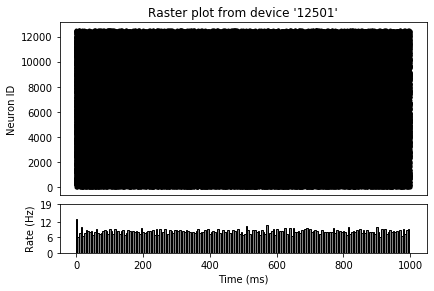

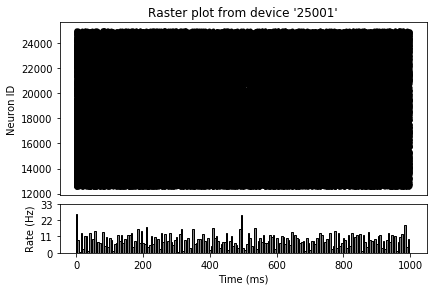

In [7]:
"""internal function for raster plot and hist"""
nest.raster_plot.from_device(nondale.spike_device, hist=True, grayscale=True)
nest.raster_plot.from_device(dale.spike_device, hist=True, grayscale=True)

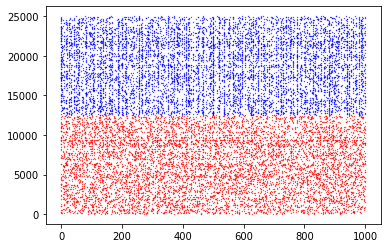

In [115]:
""" scatter plot"""
# read events
spikes_nondale = nest.GetStatus(nondale.spike_device)[0]["events"]
spikes_dale = nest.GetStatus(dale.spike_device)[0]["events"]

# masking to plot only some neurons
rand_choice = np.random.randint(0, N, 1000) # choose 1000 neurons to plot randomly
mask_nondale = np.isin(spikes_nondale["senders"], rand_choice)
mask_dale = np.isin(spikes_dale["senders"], rand_choice+N) # since two network is run sim. with a same device

# plot
plt.scatter(spikes_nondale["times"][mask_nondale], spikes_nondale["senders"][mask_nondale], s=0.1, c="r")
plt.scatter(spikes_dale["times"][mask_dale], spikes_dale["senders"][mask_dale], s=0.1, c="b")

plt.savefig("raster.pdf", bbox_inches="tight")


(array([11178., 10713., 10261., 10107., 10764.,  9786.,  9842.,  9525.,
        10830., 10639.]),
 array([1.0000e-01, 1.0008e+02, 2.0006e+02, 3.0004e+02, 4.0002e+02,
        5.0000e+02, 5.9998e+02, 6.9996e+02, 7.9994e+02, 8.9992e+02,
        9.9990e+02]),
 <a list of 10 Patch objects>)

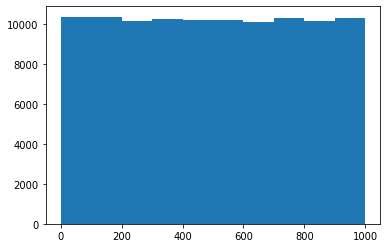

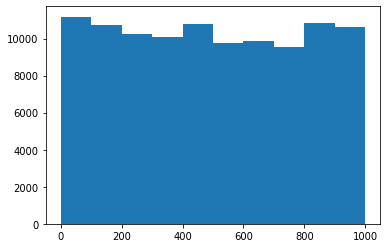

In [124]:
""" histogram """
plt.figure(1)
plt.hist(spikes_nondale["times"], bins=10)
plt.figure(2)
plt.hist(spikes_dale["times"], bins=10)

In [130]:
""" compute the avg. firing rate"""
firing_rate_nondale = spikes_nondale["times"].shape[0] / (N * T)
firing_rate_dale = spikes_dale["times"].shape[0] / (N * T)
print(firing_rate_nondale, firing_rate_dale)

0.00818336 0.0082916


In [129]:
""" compute the Fano factor """
# compute y-values of each histogram bar
hist_nondale = np.histogram(spikes_nondale["times"], bins=10)[0]
hist_dale = np.histogram(spikes_dale["times"], bins=10)[0]

# compute the Fano factor
F_nondale = np.var(hist_nondale) / np.mean(hist_nondale)
F_dale = np.var(hist_dale) / np.mean(hist_dale)
print(F_nondale, F_dale)

0.7250967817620146 25.32030006271407
